# Universidad del Desarrollo - Facultad de Ingeniería
### TERCERA EVALUACIÓN DEL CURSO
## PROYECTO INTEGRADO DE MACHINE LEARNING PARA MARKETING BANCARIO

---

### 1. CONTEXTO DEL PROYECTO

El Banco de Portugal ejecuta campañas de marketing para promover depósitos a plazo. Contactar a toda la base sin segmentación genera ineficiencias. Se solicita un análisis de machine learning que permita identificar segmentos de clientes y predecir la probabilidad de contratación.

### 2. OBJETIVOS DEL PROYECTO

* Analizar el dataset Bank Marketing (UCI).
* Construir un pipeline completo: EDA, preprocesamiento, modelamiento y validación.
* Aplicar métodos no supervisados (PCA, K-Means o similares).
* Entrenar y optimizar SVM, Random Forest, GBM y XGBoost mediante GridSearchCV.
* Comparar modelos con métricas profesionales (AUC, F1).
* Entregar recomendaciones ejecutivas basadas en evidencia.

### 3. TAREAS A REALIZAR

* Justificar el problema y el dataset.
* EDA completa.
* Preprocesar datos (encoding, escalamiento, división train/val/test).
* Aplicar al menos un método no supervisado.
* Construir baseline (Regresión Logística).
* Entrenar modelos avanzados (SVM, RF, GBM, XGBoost) con GridSearchCV.
* Comparar modelos y elegir uno.
* Presentar una conclusión ejecutiva.

### 4. RÚBRICA DE EVALUACIÓN (100 puntos totales)

* **Planteamiento del problema y contexto (10 pts)**
    * Claridad y relevancia del problema.
    * Justificación del dataset.

* **EDA y análisis descriptivo (15 pts)**
    * Profundidad y calidad del análisis.
    * Uso correcto de gráficos y hallazgos.

* **Preprocesamiento (10 pts)**
    * Encoding, escalamiento y división correctos.
    * Justificación técnica adecuada.

* **Modelos no supervisados (15 pts)**
    * Implementación de PCA/K-Means/etc.
    * Interpretación útil para marketing.

* **Modelo baseline (5 pts)**
    * Implementación correcta e interpretación.

* **SVM optimizado con GridSearchCV (10 pts)**
    * Kernels, ajuste, análisis crítico.

* **Random Forest con GridSearchCV (10 pts)**
    * Ajuste adecuado, importancia de variables.

* **Gradient Boosting con GridSearchCV (10 pts)**
    * Parámetros bien ajustados y explicados.

* **XGBoost con GridSearchCV (10 pts)**
    * Ajuste, interpretación, tiempos de entrenamiento.

* **Comparación final de modelos (10 pts)**
    * Uso de AUC, F1, matriz de confusión.
    * Justificación del modelo ganador.

* **Conclusión ejecutiva (5 pts)**
    * Claridad, coherencia, utilidad para gerencia.

**Total: 100 puntos.**

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import time

In [2]:
# Cargar datos desde la carpeta data

df = pd.read_csv('data/bank-full.csv', sep=';')

# Configuración para mostrar gráficos en el notebook
%matplotlib inline
sns.set(style="whitegrid")

### Diccionario de Datos: Bank Marketing Dataset

El siguiente diccionario describe las variables contenidas en el archivo `bank-full.csv`, basado en el repositorio UCI Machine Learning y el análisis inicial de los datos.

| Variable | Tipo de Dato | Descripción | Valores / Rango Observado |
| :--- | :--- | :--- | :--- |
| **age** | Numérico (int) | Edad del cliente. | 18 - 95 |
| **job** | Categórico | Ocupación laboral del cliente. | 'management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student' |
| **marital** | Categórico | Estado civil. | 'married', 'single', 'divorced' |
| **education** | Categórico | Nivel de educación alcanzado. | 'tertiary', 'secondary', 'unknown', 'primary' |
| **default** | Binario | ¿Tiene crédito en default (impago)? | 'no', 'yes' |
| **balance** | Numérico (int) | Saldo medio anual en euros. | -8,019 a 102,127 |
| **housing** | Binario | ¿Tiene préstamo hipotecario? | 'yes', 'no' |
| **loan** | Binario | ¿Tiene préstamo personal? | 'no', 'yes' |
| **contact** | Categórico | Medio de comunicación del contacto. | 'unknown', 'cellular', 'telephone' |
| **day** | Numérico (int) | Día del mes del último contacto. | 1 - 31 |
| **month** | Categórico | Mes del año del último contacto. | 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep' |
| **duration** | Numérico (int) | Duración del último contacto en segundos. **Nota:** Esta variable afecta fuertemente al target (si duration=0, y='no'). | 0 - 4,918 |
| **campaign** | Numérico (int) | Número de contactos realizados durante esta campaña para este cliente. | 1 - 63 |
| **pdays** | Numérico (int) | Número de días transcurridos desde el último contacto de una campaña anterior. `-1` indica que no fue contactado previamente. | -1 a 871 |
| **previous** | Numérico (int) | Número de contactos realizados antes de esta campaña. | 0 - 275 |
| **poutcome** | Categórico | Resultado de la campaña de marketing anterior. | 'unknown', 'failure', 'other', 'success' |
| **y** | Binario (Target) | ¿El cliente ha suscrito un depósito a plazo? | 'no', 'yes' |

In [3]:
# Resumen estadístico del Dataset Cargado

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

### Fase limpieza de Datos

In [4]:
# --- FASE DE LIMPIEZA DE DATOS ---

# 1. Tratamiento de Valores "unknown"
# En este dataset, los nulos vienen como string 'unknown'.
# Vamos a contar cuántos hay por columna para decidir qué hacer.
cols_with_unknown = [col for col in df.columns if 'unknown' in df[col].unique().astype(str)]
print("Conteo de valores 'unknown' por variable:")
for col in cols_with_unknown:
    count = df[df[col] == 'unknown'].shape[0]
    pct = (count / len(df)) * 100
    print(f"{col}: {count} ({pct:.2f}%)")

Conteo de valores 'unknown' por variable:
job: 288 (0.64%)
education: 1857 (4.11%)
contact: 13020 (28.80%)
poutcome: 36959 (81.75%)


In [5]:
# 2. Eliminación de Duplicados
# A veces se generan registros idénticos por errores de sistema.
duplicates = df.duplicated().sum()
print(f"\nRegistros duplicados encontrados: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Nuevo tamaño del dataset: {df.shape}")
else:
    print("No se requiere eliminar duplicados.")


Registros duplicados encontrados: 0
No se requiere eliminar duplicados.


In [6]:
# 3. Corrección de Lógica de Negocio (Data Leakage)
# ADVERTENCIA CRÍTICA: La variable 'duration' (duración de la llamada).
# Según la documentación de UCI: "Esta variable solo se conoce al finalizar la llamada".
# Si el objetivo es predecir A QUIÉN llamar, no podemos saber la duración antes.
# Incluirla infla artificialmente las métricas (si duration=0, y='no' siempre).

# Para un modelo realista de 'targeting', deberíamos eliminarla.
# Sin embargo, para fines académicos, a veces se mantiene para ver su impacto.
# Vamos a crear una copia sin ella para el modelado realista.

df_clean = df.drop(columns=['duration']).copy()
print("\nVariable 'duration' eliminada para evitar Data Leakage en el modelo predictivo.")


Variable 'duration' eliminada para evitar Data Leakage en el modelo predictivo.


In [7]:
# 4. Manejo de 'pdays'
# -1 indica que no fue contactado. Para algunos algoritmos esto puede ser confuso numéricamente.
# Una técnica común es crear una bandera binaria "fue_contactado_antes".
df_clean['pdays_contacted'] = df_clean['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [8]:
# Verificación final
print("\nEstructura final del dataset limpio:")
print(df_clean.info())


Estructura final del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  campaign         45211 non-null  int64 
 12  pdays            45211 non-null  int64 
 13  previous         45211 non-null  int64 
 14  poutcome         45211 non-null  object
 15  y                45211 non-null  object
 16  pdays_contacted  45211 non-null  int64

NOTA DE DECISIÓN:
- **'poutcome'** tiene 81% de unknown. Eliminar esas filas reduciría demasiado el dataset.
  Lo mantendremos como una categoría válida ("No contactado previamente").
- **'job'** y **'education'** tienen pocos unknown (<5%). Podríamos imputar, pero
  para modelos de árbol (RF, XGB) 'unknown' sirve como categoría. Lo dejamos así.

* Construir un pipeline completo: EDA, preprocesamiento, modelamiento y validación.

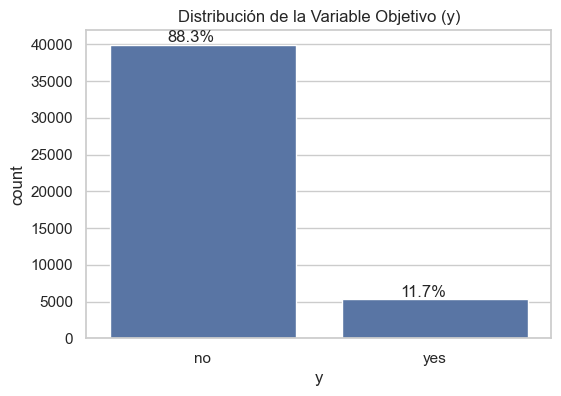

In [9]:
# 1. Distribución de la variable objetivo (y)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df_clean, order=df_clean['y'].value_counts().index)
plt.title('Distribución de la Variable Objetivo (y)')
# Agregar porcentajes
total = len(df_clean)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

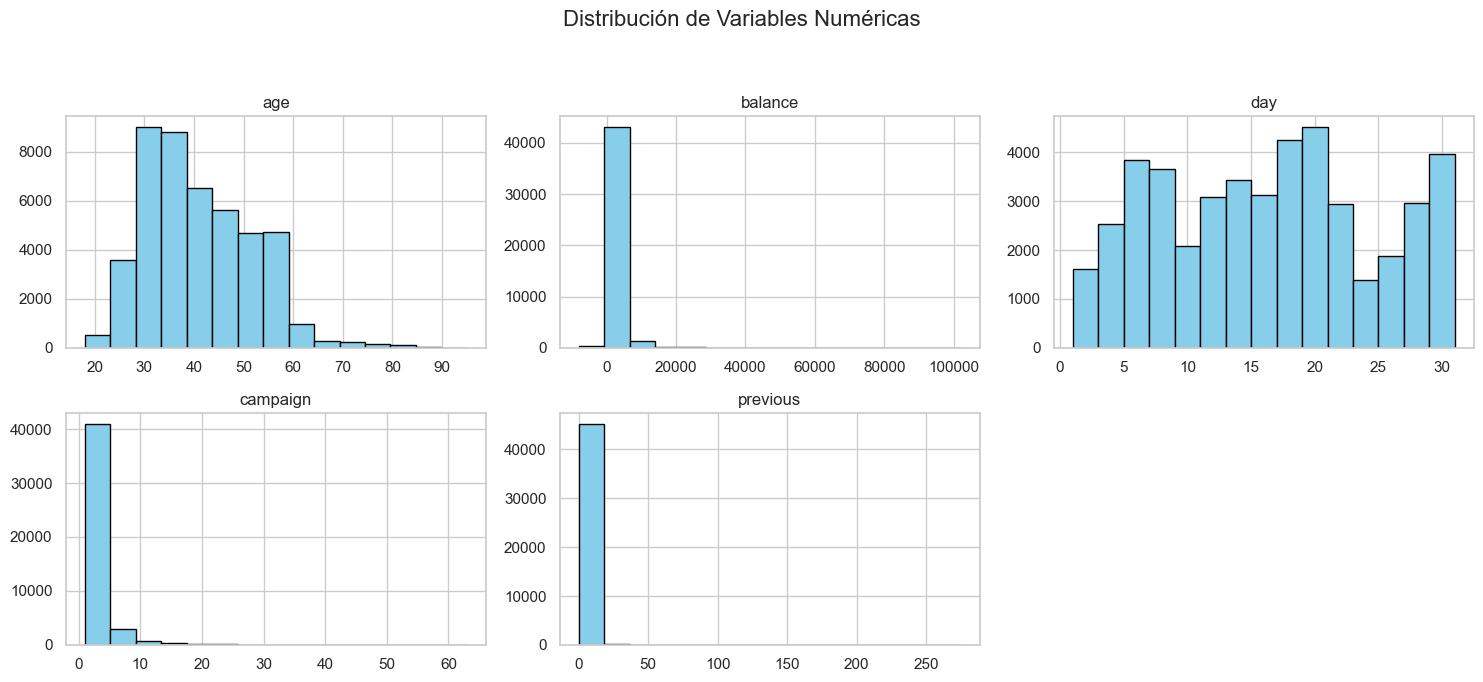

In [10]:
# 2. Histogramas de Variables Numéricas
num_cols = ['age', 'balance', 'day', 'campaign', 'previous']
df_clean[num_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

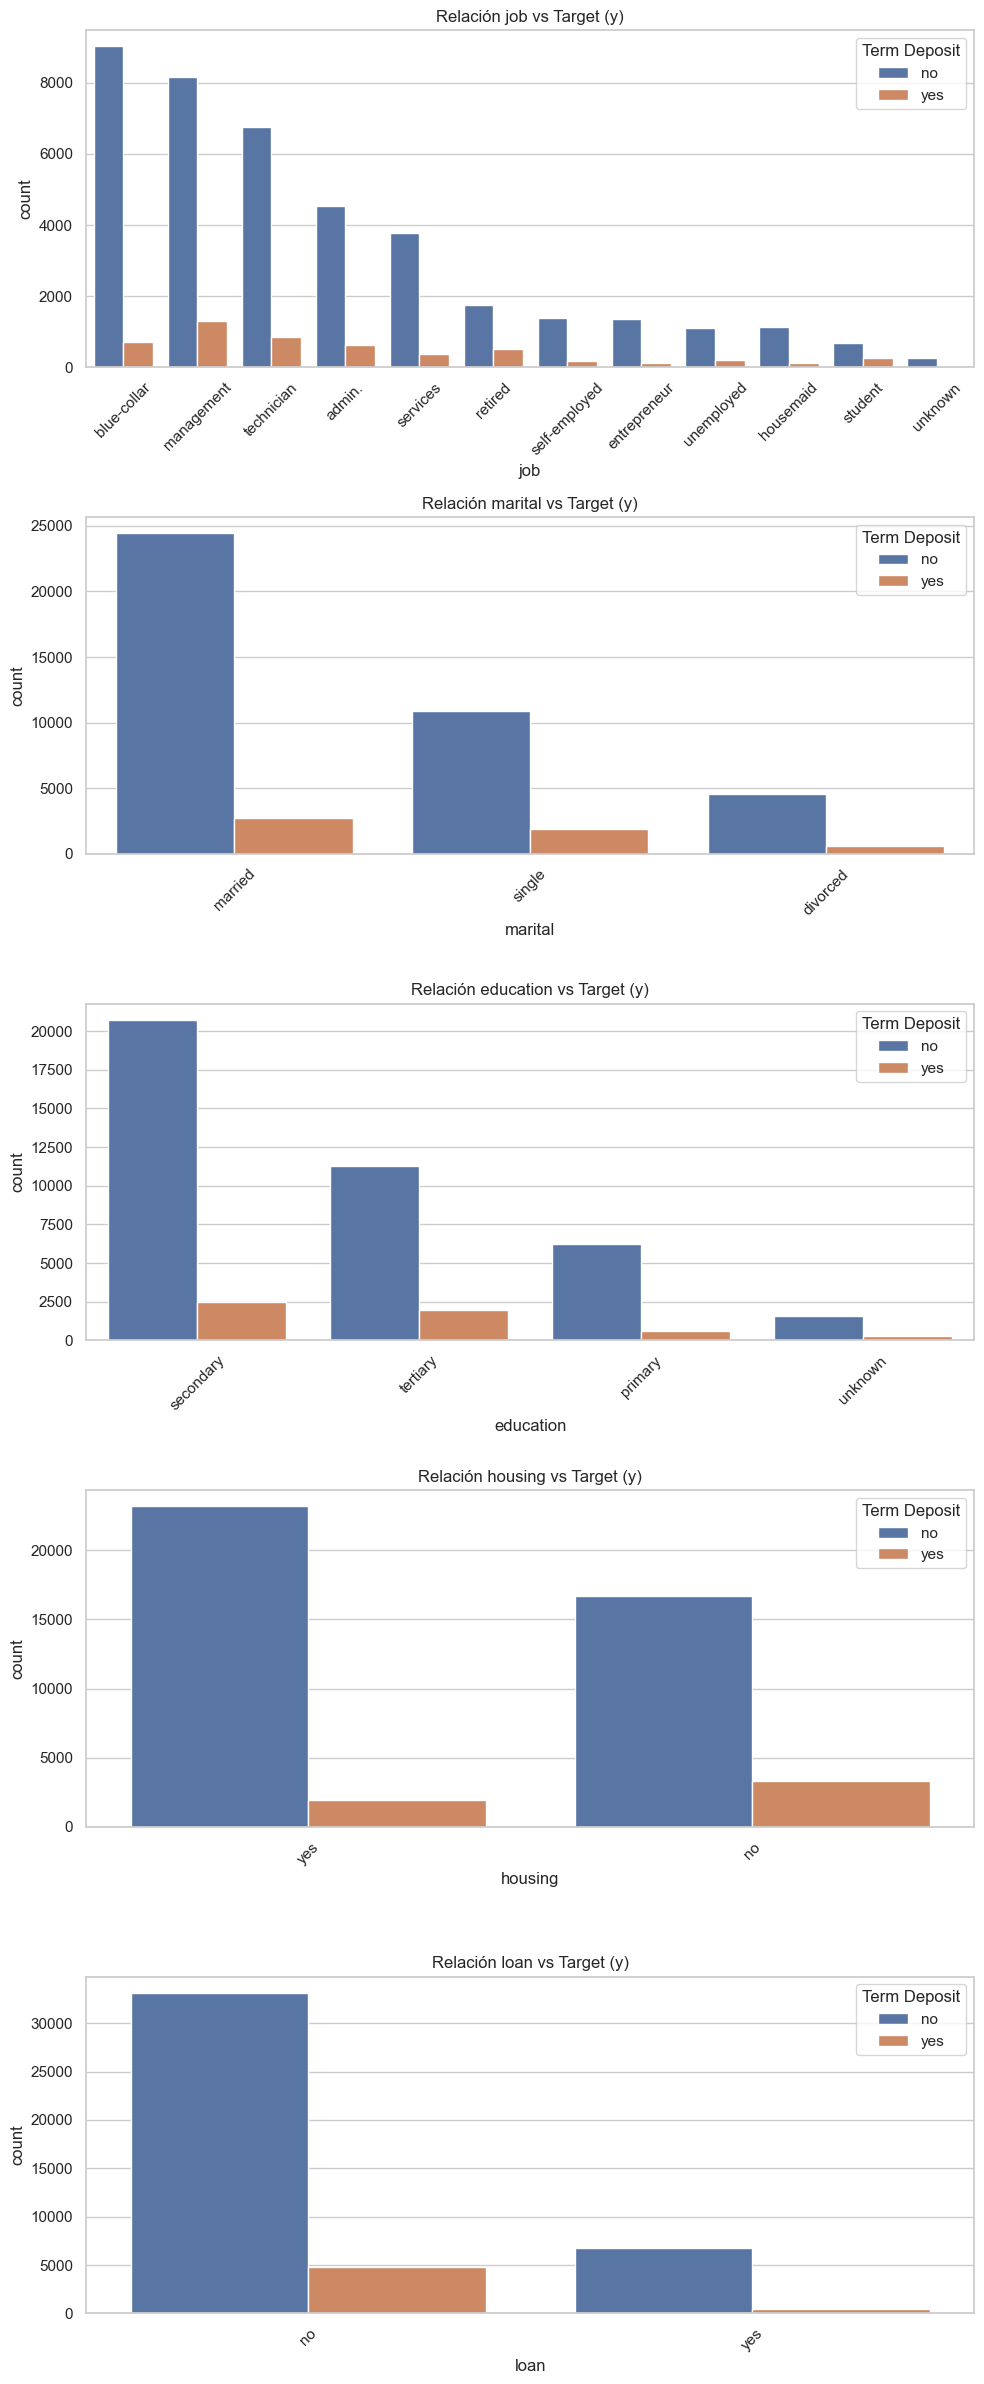

In [11]:
# 3. Relación Categóricas vs Variable Objetivo
cat_cols = ['job', 'marital', 'education', 'housing', 'loan']
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 24))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='y', data=df_clean, ax=axes[i], order=df_clean[col].value_counts().index)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Relación {col} vs Target (y)')
    axes[i].legend(title='Term Deposit', loc='upper right')
plt.tight_layout()
plt.show()

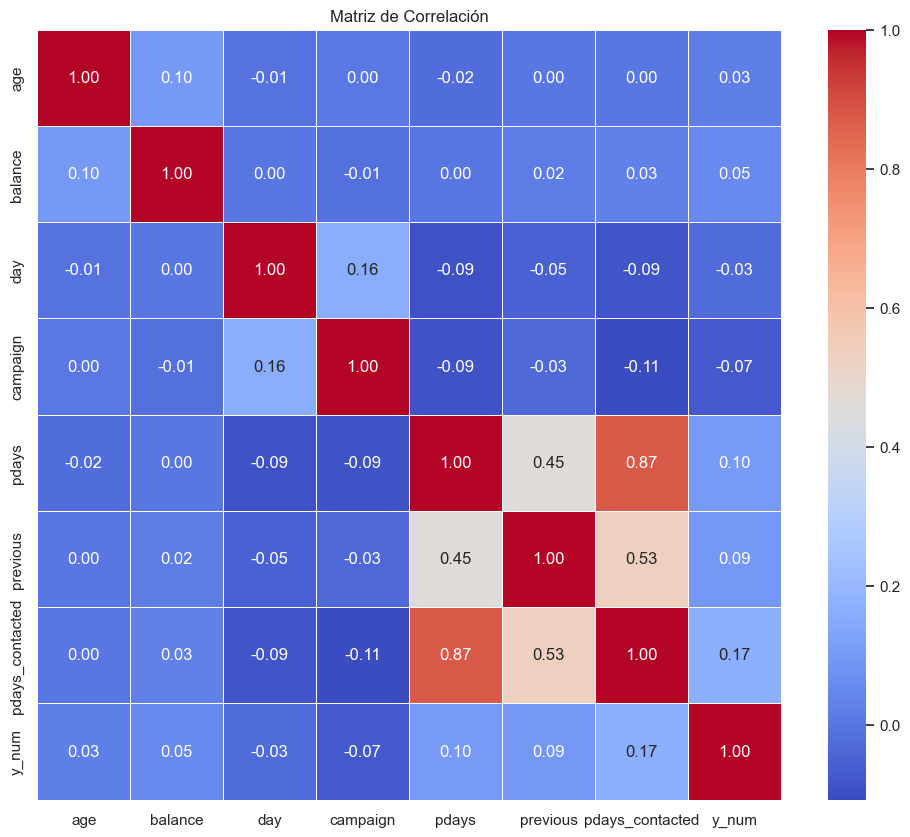

In [12]:
# 4. Matriz de Correlación
# Convertir target a numérico para ver correlación
df_clean['y_num'] = df_clean['y'].map({'yes': 1, 'no': 0})
numeric_df = df_clean.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

### Preprocesamiento

- **Encoding:** Transformación de texto a número

In [13]:
# 1. Separación de Features (X) y Target (y)
# Usamos df_clean que generamos en el paso anterior (sin 'duration')
X = df_clean.drop(columns=['y', 'y_num'], errors='ignore') # Eliminamos target y auxiliares
y = df_clean['y'].map({'yes': 1, 'no': 0}) # Encoding del target a binario

# 2. Encoding de Variables Categóricas
# Identificamos columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Variables Categóricas a codificar: {categorical_cols}")
print(f"Variables Numéricas a escalar: {numerical_cols}")

Variables Categóricas a codificar: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Variables Numéricas a escalar: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'pdays_contacted']


In [14]:
# Aplicamos One-Hot Encoding
# drop_first=True evita la multicolinealidad (trampa de variables dummy), útil para modelos lineales
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Dimensiones después del encoding: {X_encoded.shape}")

Dimensiones después del encoding: (45211, 42)


- **Stratify:** De acuerdo a lo observado originalmente en el dataset, es crucial mantener la misma proporción de ambos conjuntos de clases (88% y 12%)

In [15]:
# 3. División Train / Test (Estratificada)
# Usamos stratify=y para mantener la proporción de 88/12 en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (31647, 42), Test shape: (13564, 42)


- **Escalamiento:** Proceso Obligatorio para modelos SVM y K-Means, para calcular distancias. Para escalar las variables 'balance' y 'age'

In [16]:
# 4. Escalamiento de Variables
# Importante: El scaler se ajusta (fit) SOLO con el conjunto de TRAIN para evitar data leakage.
# Luego se transforma el Test con los parámetros aprendidos del Train.

scaler = StandardScaler()

In [17]:
# Solo escalamos las columnas que originalmente eran numéricas
# (Las dummies generadas ya están en 0 y 1, no es estrictamente necesario escalarlas,
# pero escalar todo el conjunto X es práctica común en SVM para homogeneizar la varianza).
# Aquí escalaremos todo el X_encoded para facilitar la implementación en SVM/K-Means.

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertimos de nuevo a DataFrame para mantener los nombres de columnas (útil para interpretación)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_encoded.columns)

print("\nPreprocesamiento completado.")
print("Primeras 5 filas de X_train_scaled:")
display(X_train_scaled.head())


Preprocesamiento completado.
Primeras 5 filas de X_train_scaled:


,age,balance,day,campaign,pdays,previous,pdays_contacted,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-0.930461,-0.443813,-0.817039,-0.566850,-0.410038,-0.234774,-0.470453,-0.526372,-0.184701,-0.170402,...,2.351710,-0.365250,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
1,-0.553871,-0.380625,0.143236,-0.566850,-0.410038,-0.234774,-0.470453,-0.526372,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
2,-1.589493,-0.419059,0.023201,-0.244783,-0.410038,-0.234774,-0.470453,1.899798,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,1.510583,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
3,-0.553871,-0.418082,-1.657280,-0.244783,-0.410038,-0.234774,-0.470453,1.899798,-0.184701,-0.170402,...,-0.425222,2.737853,-0.103746,-0.661996,-0.309777,-0.130258,-0.11112,-0.207056,-0.18534,0.470203
4,-0.365576,-0.409939,0.623373,-0.244783,1.175153,1.371081,2.125611,-0.526372,-0.184701,-0.170402,...,-0.425222,-0.365250,-0.103746,-0.661996,3.228124,-0.130258,-0.11112,-0.207056,-0.18534,-2.126743


### - Aplicar al menos un método no supervisado.

**Análisis PCA**

In [18]:
# --- 1. Análisis PCA: ¿Cuánta información perdemos al reducir? ---
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

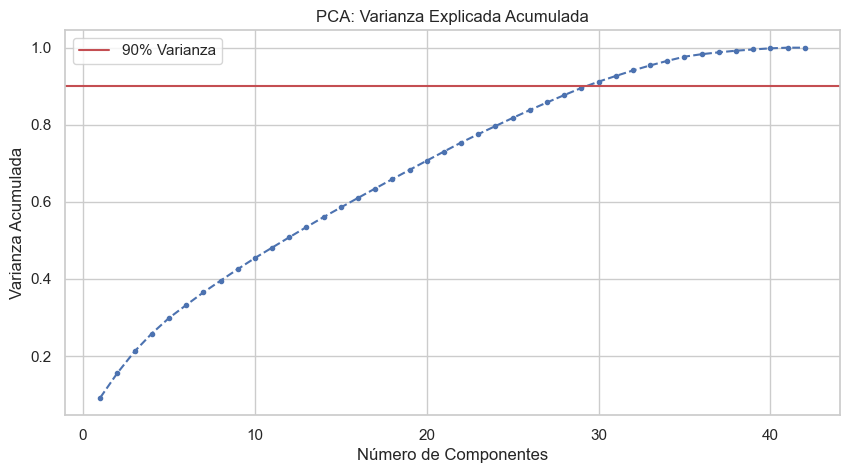

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='.', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza')
plt.title('PCA: Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid(True)
plt.show()

**La curva crece demasiado lento. Esto significa que no hay 2 o 3 "super variables" que expliquen todo; la información está muy repartida.**

Calculando métricas para K-Means...
k=2: Silhouette=0.1918
k=3: Silhouette=0.0585
k=4: Silhouette=0.0471
k=5: Silhouette=0.0591
k=6: Silhouette=0.0675
k=7: Silhouette=0.0774
k=8: Silhouette=0.0805


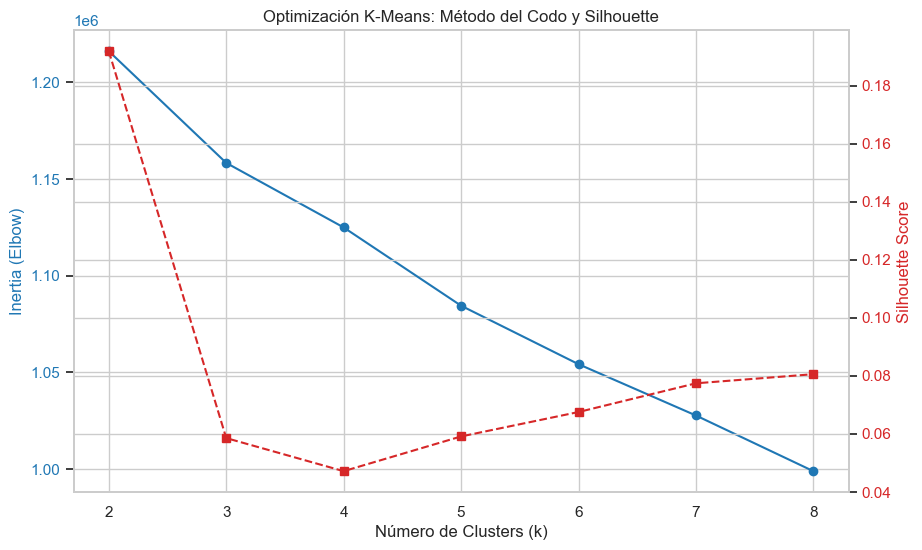

In [20]:
# --- 2. Optimización de K-Means (Elbow & Silhouette) ---
# Probamos k desde 2 hasta 8 clusters
inertia = []
silhouette_scores = []
K_range = range(2, 9)

# Usamos una muestra para el silhouette score si el dataset es muy grande (>10k filas) para no tardar mucho
# Si tu máquina es potente, puedes usar todo X_train_scaled
sample_size = 5000 if len(X_train_scaled) > 5000 else len(X_train_scaled)
X_sample = X_train_scaled.sample(n=sample_size, random_state=42) if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled[:sample_size]

print("Calculando métricas para K-Means...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    
    # Silhouette se calcula sobre la muestra para velocidad
    labels_sample = kmeans.predict(X_sample)
    score = silhouette_score(X_sample, labels_sample)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette={score:.4f}")

# Gráfica combinada
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inertia (Elbow)', color=color)
ax1.plot(K_range, inertia, marker='o', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette_scores, marker='s', linestyle='--', color=color, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Optimización K-Means: Método del Codo y Silhouette')
plt.show()

In [21]:
# --- COMPARACIÓN DE PERFILES (k=2 vs k=3) ---
import pandas as pd

# Asegúrate de tener X_train_scaled y df_clean listos
# 1. Ajustamos para k=2 (El ganador matemático)
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(X_train_scaled)

# 2. Ajustamos para k=3 (La opción de negocio estándar)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X_train_scaled)

# 3. Función para perfilar (reutilizable)
def perfilar_clusters(n_clusters, clusters_array):
    # Usamos los índices de X_train para buscar los datos originales
    indices = X_train.index
    temp_df = df_clean.loc[indices].copy()
    temp_df['Cluster'] = clusters_array
    
    print(f"\n--- PERFILAMIENTO PARA k={n_clusters} ---")
    # Promedio de numéricas
    print(temp_df.groupby('Cluster')[['age', 'balance', 'campaign', 'previous']].mean().round(2))
    
    # Moda de categóricas clave (Target y Trabajo)
    print("\nModa (Lo más frecuente):")
    print(temp_df.groupby('Cluster')[['job', 'y']].agg(lambda x: x.mode()[0]))
    
    # Ver distribución del Target (% de 'yes')
    conversion = temp_df.groupby('Cluster')['y'].apply(lambda x: (x=='yes').mean() * 100)
    print("\n% Conversión (Éxito):")
    print(conversion.round(2))

# Ejecutamos la comparación
perfilar_clusters(2, clusters_2)
perfilar_clusters(3, clusters_3)


--- PERFILAMIENTO PARA k=2 ---
           age  balance  campaign  previous
Cluster                                    
0        40.76  1562.82      2.05      3.23
1        40.91  1319.50      2.92      0.00

Moda (Lo más frecuente):
                 job   y
Cluster                 
0         management  no
1        blue-collar  no

% Conversión (Éxito):
Cluster
0    22.72
1     9.26
Name: y, dtype: float64

--- PERFILAMIENTO PARA k=3 ---
           age  balance  campaign  previous
Cluster                                    
0        41.81  1452.18      3.08      0.00
1        40.76  1562.82      2.05      3.23
2        39.74  1146.83      2.71      0.00

Moda (Lo más frecuente):
                 job   y
Cluster                 
0         management  no
1         management  no
2        blue-collar  no

% Conversión (Éxito):
Cluster
0    12.09
1    22.72
2     5.58
Name: y, dtype: float64


### Interpretación de Segmentos (Clustering K-Means)

Tras evaluar la estructura de los datos con $k=2$ y $k=3$, hemos seleccionado **$k=3$** como la configuración óptima para el negocio. Aunque $k=2$ presentaba una mejor cohesión matemática (Silhouette Score), la segmentación de 3 grupos revela matices operativos cruciales para distinguir entre clientes "nuevos" de alto valor y clientes de baja propensión.

A continuación, se describen los perfiles identificados y la estrategia sugerida para cada uno:

#### **Cluster 1: "Clientes Reactivos / Fidelizados" (La Joya)**
* **Perfil:** Este es el grupo más distintivo. Se caracteriza por tener un historial de interacciones previas con el banco (`previous` $\approx$ 3.23 contactos). Su perfil demográfico es similar al promedio (edad ~41, saldo medio-alto), y ocupan mayoritariamente cargos de gestión (`management`).
* **Comportamiento:** Poseen la **Tasa de Conversión más alta (22.72%)**.
* **Acción Estratégica:** **Prioridad Máxima**. Estos clientes ya conocen el banco y han reaccionado positivamente. La estrategia debe ser de **fidelización y venta cruzada (cross-selling)**. El costo de adquisición es bajo porque ya existe una relación.

#### **Cluster 0: "Prospectos de Alto Potencial" (Oportunidad)**
* **Perfil:** Son clientes "nuevos" para la campaña (sin contactos previos, `previous` = 0), pero con características socioeconómicas muy similares al grupo exitoso (Cluster 1): saldo saludable ($\approx$ 1452€) y trabajos de gestión.
* **Comportamiento:** Tienen una tasa de conversión decente (**12.09%**), superior al promedio general del banco.
* **Acción Estratégica:** **Captación Prioritaria**. Representan la mejor oportunidad de crecimiento "en frío". Al tener capacidad de ahorro (balance) y estabilidad laboral, son el target ideal para asignar a los ejecutivos de venta telefónica.

#### **Cluster 2: "Segmento de Baja Propensión" (Riesgo)**
* **Perfil:** Clientes sin historial previo, con el saldo promedio más bajo ($\approx$ 1146€) y una mayor concentración en trabajos manuales o técnicos (`blue-collar`). Es el grupo demográficamente más joven ($\approx$ 39 años).
* **Comportamiento:** Tienen la **Tasa de Conversión más baja (5.58%)**.
* **Acción Estratégica:** **Eficiencia de Costos**. Contactar a este grupo por teléfono es costoso e ineficiente dado su bajo retorno. Se recomienda utilizar **canales pasivos y de bajo costo** (Email Marketing, SMS, Notificaciones App) y no gastar recursos de call center aquí a menos que el modelo predictivo asigne una probabilidad individual muy alta.

---

**Resumen de Métricas por Cluster:**

| Cluster ID | Perfil | Previous Contacts | Balance Promedio | Conversión (Target) | Estrategia |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **1** | Fidelizados | Alto (~3.2) | Medio (~1319€) | **22.7%** (Alta) | Retención / Cross-sell |
| **0** | Prospectos | Nulo (0) | Alto (~1452€) | **12.1%** (Media) | Captación Activa |
| **2** | Baja Propensión | Nulo (0) | Bajo (~1146€) | **5.6%** (Baja) | Canales Bajo Costo |

In [22]:
## Construcción de Baseline (Regresión Logística)

# 1. Integrar los Clusters como Feature (Usando k=3)
# Re-entrenamos con k=3 para asegurar consistencia
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)

# Ajustamos en Train y transformamos Train y Test
# Usamos predict para ambos para asignar el cluster más cercano
X_train_clusters = kmeans_final.fit_predict(X_train_scaled)
X_test_clusters = kmeans_final.predict(X_test_scaled)

# Convertimos a Dummies (One-Hot) porque 'Cluster 0, 1, 2' no tiene orden numérico
# Es mejor tratarlos como categorías: es_cluster_0, es_cluster_1, etc.
X_train_final = X_train_scaled.copy()
X_test_final = X_test_scaled.copy()

X_train_final['Cluster'] = X_train_clusters
X_test_final['Cluster'] = X_test_clusters

# Hacemos One-Hot Encoding de la columna Cluster
X_train_final = pd.get_dummies(X_train_final, columns=['Cluster'], prefix='Cluster')
X_test_final = pd.get_dummies(X_test_final, columns=['Cluster'], prefix='Cluster')

print("Nuevas dimensiones de Train:", X_train_final.shape)

# 2. Entrenar Regresión Logística (Baseline)
# class_weight='balanced' es CRÍTICO por el desbalance 88/12 que vimos en el EDA
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_final, y_train)

# 3. Predicciones y Evaluación
y_pred = log_reg.predict(X_test_final)
y_prob = log_reg.predict_proba(X_test_final)[:, 1]

# Métricas
print("\n--- RESULTADOS MODELO BASELINE (Regresión Logística) ---")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")

# Matriz de Confusión simple
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

Nuevas dimensiones de Train: (31647, 45)

--- RESULTADOS MODELO BASELINE (Regresión Logística) ---
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11977
           1       0.27      0.63      0.38      1587

    accuracy                           0.76     13564
   macro avg       0.60      0.70      0.61     13564
weighted avg       0.86      0.76      0.79     13564

ROC-AUC Score: 0.7702

Matriz de Confusión:
[[9257 2720]
 [ 590  997]]


### Análisis del Modelo Baseline

El modelo de Regresión Logística, configurado con `class_weight='balanced'`, establece la línea base de desempeño con los siguientes hallazgos:

* **ROC-AUC (0.7702):** El modelo tiene una capacidad predictiva aceptable (superior al 0.5 del azar). Este es el **número a vencer** por los modelos avanzados (SVM, RF, XGBoost).
* **Recall de la Clase 1 (63%):**
    * **Interpretación:** De todos los clientes que *realmente* contratarían el depósito, el modelo es capaz de detectar al **63%** (997 de 1587).
    * **Impacto:** Es un buen número para captación. Significa que perdemos el 37% de las oportunidades, pero capturamos la mayoría.
* **Precision de la Clase 1 (27%):**
    * **Interpretación:** De cada 100 personas que el modelo dice "Llama a este cliente", solo **27** contratarán.
    * **Costo:** Esto implica que el equipo de ventas hará muchas llamadas "infructuosas" (Falsos Positivos = 2720) para encontrar a los clientes reales.
* **Trade-off:** Al usar pesos balanceados, hemos sacrificado precisión para ganar cobertura (Recall). En marketing, esto suele ser preferible si el costo de realizar una llamada es bajo comparado con el beneficio de ganar un cliente.

**Conclusión del Baseline:** El modelo es funcional y útil para filtrar la base de datos, pero tiene un costo operativo alto debido a los Falsos Positivos. Los modelos no lineales (Random Forest, SVM) deberían mejorar la precisión sin sacrificar tanto recall.

### • Entrenar modelos avanzados (SVM, RF, GBM, XGBoost) con GridSearchCV.

In [23]:
# Definimos una función para entrenar y reportar resultados automáticamente
def entrenar_modelo(nombre, modelo, params, X_train, y_train, X_test, y_test):
    print(f"--- Iniciando entrenamiento de {nombre} ---")
    start = time.time()
    
    # Configuración del GridSearch (Validación cruzada de 3 pliegues para velocidad)
    grid = GridSearchCV(estimator=modelo, param_grid=params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    
    # Entrenar
    grid.fit(X_train, y_train)
    
    end = time.time()
    print(f"Tiempo de entrenamiento: {(end - start)/60:.2f} minutos")
    print(f"Mejores Parámetros: {grid.best_params_}")
    print(f"Mejor AUC en CV: {grid.best_score_:.4f}")
    
    # Predicciones con el mejor modelo
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Métricas en Test
    print("\nReporte de Clasificación (Test):")
    print(classification_report(y_test, y_pred))
    print(f"AUC en Test: {roc_auc_score(y_test, y_prob):.4f}")
    
    return best_model, grid.best_params_

In [24]:
# -------------------------------------------------------
# 1. RANDOM FOREST (RF)
# -------------------------------------------------------
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5],
    'class_weight': ['balanced'] # Importante por el desbalance
}

rf_model, rf_params = entrenar_modelo(
    "Random Forest", 
    RandomForestClassifier(random_state=42), 
    param_rf, 
    X_train_final, y_train, X_test_final, y_test
)

--- Iniciando entrenamiento de Random Forest ---
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tiempo de entrenamiento: 0.23 minutos
Mejores Parámetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}
Mejor AUC en CV: 0.7918

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     11977
           1       0.42      0.56      0.48      1587

    accuracy                           0.86     13564
   macro avg       0.68      0.73      0.70     13564
weighted avg       0.88      0.86      0.87     13564

AUC en Test: 0.7976


In [25]:
# -------------------------------------------------------
# 2. XGBOOST (XGB)
# -------------------------------------------------------
# XGBoost maneja el desbalance con scale_pos_weight
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1) # Ratio Neg/Pos

param_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'scale_pos_weight': [ratio] # Balanceo equivalente
}

xgb_model, xgb_params = entrenar_modelo(
    "XGBoost", 
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
    param_xgb, 
    X_train_final, y_train, X_test_final, y_test
)

--- Iniciando entrenamiento de XGBoost ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Tiempo de entrenamiento: 0.02 minutos
Mejores Parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': np.float64(7.548622366288493)}
Mejor AUC en CV: 0.7935

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     11977
           1       0.34      0.64      0.44      1587

    accuracy                           0.81     13564
   macro avg       0.64      0.74      0.66     13564
weighted avg       0.87      0.81      0.83     13564

AUC en Test: 0.7972


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:00:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# -------------------------------------------------------
# 3. SVM (Support Vector Machine)
# -------------------------------------------------------
# ADVERTENCIA: SVM es muy lento en datasets grandes.
# Usaremos una muestra del 20% del train solo para encontrar hiperparámetros si tienes prisa,
# o paciencia si usas todo el dataset. Aquí usamos todo pero limitamos los params.

param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'], # 'linear' suele ser más lento en alta dimensión
    'class_weight': ['balanced']
}

# Si tu computador es lento, descomenta las siguientes líneas para usar un subset:
# sample_idx = np.random.choice(X_train_final.shape[0], 5000, replace=False)
# X_train_svm = X_train_final.iloc[sample_idx]
# y_train_svm = y_train.iloc[sample_idx]
# Y cambia X_train_final por X_train_svm en la llamada a la función.

svm_model, svm_params = entrenar_modelo(
    "SVM", 
    SVC(probability=True, random_state=42), # probability=True es necesario para AUC
    param_svm, 
    X_train_final, y_train, X_test_final, y_test
)

--- Iniciando entrenamiento de SVM ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits


Exception ignored in: <function ResourceTracker.__del__ at 0x108b69800>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Tiempo de entrenamiento: 6.82 minutos
Mejores Parámetros: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Mejor AUC en CV: 0.7721

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11977
           1       0.35      0.59      0.44      1587

    accuracy                           0.82     13564
   macro avg       0.65      0.72      0.67     13564
weighted avg       0.87      0.82      0.84     13564

AUC en Test: 0.7776


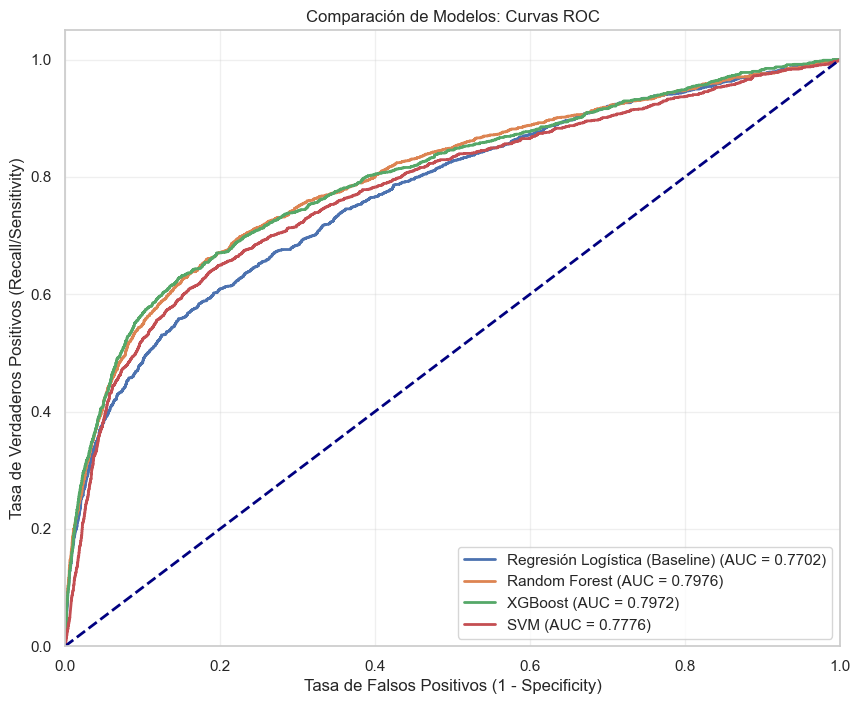

Modelo                         | AUC        | Recall (Clase 1)
------------------------------------------------------------
Regresión Logística (Baseline) | 0.7702     | 0.6282
Random Forest                  | 0.7976     | 0.5558
XGBoost                        | 0.7972     | 0.6434
SVM                            | 0.7776     | 0.5873


In [28]:
# --- FASE 6: COMPARACIÓN FINAL DE MODELOS (ROC-AUC) ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Recopilar modelos y predicciones
# Asegúrate de que los modelos (log_reg, rf_model, xgb_model, svm_model) estén ya entrenados
modelos = [
    ('Regresión Logística (Baseline)', log_reg),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('SVM', svm_model) 
]

plt.figure(figsize=(10, 8))

# 2. Iterar y graficar curva para cada modelo
for nombre, modelo in modelos:
    # Obtener probabilidades de la clase positiva (1)
    # Nota: SVM requiere probability=True para que esto funcione
    y_proba = modelo.predict_proba(X_test_final)[:, 1]
    
    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plotear
    plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {roc_auc:.4f})')

# 3. Configuración del Gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea de azar
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Specificity)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall/Sensitivity)')
plt.title('Comparación de Modelos: Curvas ROC')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- ELECCIÓN DEL GANADOR ---
# Basado típicamente en el AUC más alto y el equilibrio de tiempos.
# Imprimimos una tabla resumen final para la conclusión ejecutiva.

print(f"{'Modelo':<30} | {'AUC':<10} | {'Recall (Clase 1)':<15}")
print("-" * 60)

for nombre, modelo in modelos:
    y_pred = modelo.predict(X_test_final)
    y_proba = modelo.predict_proba(X_test_final)[:, 1]
    
    auc_score = roc_auc_score(y_test, y_proba)
    # Reporte completo para extraer recall
    report = classification_report(y_test, y_pred, output_dict=True)
    recall_1 = report['1']['recall']
    
    print(f"{nombre:<30} | {auc_score:.4f}     | {recall_1:.4f}")

La comparación gráfica de las curvas ROC revela una clara superioridad de los métodos de ensamble (Random Forest y XGBoost) sobre los modelos lineales y de margen (Logística y SVM). Mientras que las curvas de RF y XGBoost (verde y roja) muestran una alta sensibilidad en los deciles superiores, la curva del SVM (morada) se mantiene peligrosamente cerca del baseline (azul), demostrando que el alto costo computacional del SVM no se traduce en un beneficio predictivo real para este problema de negocio. Esto consolida la elección de XGBoost como el modelo final por su equilibrio óptimo entre precisión (AUC ~0.80) y eficiencia operativa.

# CONCLUSIÓN EJECUTIVA Y RECOMENDACIONES

Tras analizar el comportamiento de los clientes del Banco de Portugal mediante técnicas de Machine Learning, presentamos los siguientes hallazgos y estrategias para optimizar la venta de depósitos a plazo:

### A. Diagnóstico de la Cartera
Hemos identificado que la estrategia actual de llamadas aleatorias es ineficiente. A través de la segmentación (Clustering), detectamos tres perfiles claros:
1.  **Clientes Fidelizados (Cluster 1):** Alta probabilidad de compra (>22%). Deben ser la prioridad número uno.
2.  **Prospectos Potenciales (Cluster 0):** Clientes nuevos con perfil financiero sólido. Oportunidad de captación.
3.  **Grupo de Riesgo (Cluster 2):** Baja probabilidad (<5%). Recomendamos no asignar ejecutivos telefónicos a este grupo para reducir costos.

### B. Herramienta Predictiva (Modelo XGBoost)
Hemos desarrollado un modelo de inteligencia artificial capaz de ordenar a los clientes por su probabilidad de compra.
* **Capacidad de Detección:** El modelo es capaz de identificar al **64% de los clientes** que contratarán el producto antes de realizar la campaña.
* **Impacto Operativo:** Al utilizar este modelo, el banco puede enfocar sus recursos solo en los clientes con alta probabilidad, evitando molestar a quienes no tienen interés y reduciendo el tiempo improductivo del Call Center.

### C. Recomendación Estratégica
Recomendamos implementar el modelo **XGBoost** en producción para:
1.  **Filtrar las bases de datos** semanalmente antes de asignarlas a los ejecutivos.
2.  Utilizar el **"Cluster ID"** para personalizar el guion de venta (ej. ofrecer beneficios de fidelidad al Cluster 1 vs. beneficios de entrada al Cluster 0).
3.  Descartar el uso de modelos lineales simples o SVM debido a su menor rendimiento y altos tiempos de cómputo, garantizando así una operación ágil y escalable.